In [112]:
#libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text, labs, geom_col, geom_point, geom_density, coord_flip, theme_minimal, geom_boxplot, scale_fill_manual

**Coffee Lovers Unite!**
If caffeine is one of the most popular drugs, then coffee is likely one of the most popular delivery systems for it. Aside from caffeine, people enjoy the wonderful variety of coffee-related drinks. Let’s do a rough investigation of the “market share” by two of the top coffee chains in the United States!

World Population Review provides some great data on store locations and chain prevalence. Check out this page for the Starbucks Coffee locations in the United States. Notice that this page only really gives the name of the state and the number of locations in that state.

**Scrape the Location Counts**

1. Use the beautifulsoup library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:
- Starbucks
- Dunkin’ Donuts

2. Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website.

In [113]:
#1 (STARBUCKS)
#requests
sb_response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

#soup
sb_soup = BeautifulSoup(sb_response.content, "html.parser")


In [114]:
#table (dont want table to be a list)
sb_table = sb_soup.find("table",
                    attrs={
                      "class": "wpr-table"}
                  )

In [115]:
#turn html into actual dataframe

# initialize an empty list
rows = []

# iterate over all rows in the city table
#we do 1: b/c there is only 1 header row in this data
for state in sb_table.find_all("tr")[1:]:

    # Get all the cells (<th>) and (<td>) in the row.
    cells_state = state.find_all("th")
    cells_obs = state.find_all("td")
    
    # Find the the name of the state in cell[0]
    # which for most state is contained in the <a> tag
    state_tag = cells_state[0].find("a") or cells_state[0]
    state = state_tag.text.strip()

    #find # stores in 2023
    stores_2023_tag = cells_obs[0].find("td") or cells_obs[0]
    stores_2023 = stores_2023_tag.text.strip()

    #find # stores in 2021
    stores_2021_tag = cells_obs[1].find("td") or cells_obs[1]
    stores_2021 = stores_2021_tag.text.strip()

     #find # stores in 2024
    stores_2024_tag = cells_obs[2].find("td") or cells_obs[2]
    stores_2024 = stores_2024_tag.text.strip()

    # Append this data.
    rows.append({
            "state": state,
            "2023": stores_2023,
            "2021": stores_2021,
            "2024": stores_2024
     })


sb_df = pd.DataFrame(rows)
#sb_df.head()

In [116]:
#1 (DUNKIN DONUTS)
#requests
dd_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")

#soup
dd_soup = BeautifulSoup(dd_response.content, "html.parser")


In [117]:
#table (dont want table to be a list)
dd_table = dd_soup.find("table",
                    attrs={
                      "class": "wpr-table"}
                  )

In [118]:
#turn html into actual dataframe

# initialize an empty list
rows = []

# iterate over all rows in the city table
#we do 1: b/c there is only 1 header row in this data
for state in dd_table.find_all("tr")[1:]:

    # Get all the cells (<th>) and (<td>) in the row.
    cells_state = state.find_all("th")
    cells_obs = state.find_all("td")
    
    # Find the the name of the state in cell[0]
    # which for most state is contained in the <a> tag
    state_tag = cells_state[0].find("a") or cells_state[0]
    state = state_tag.text.strip()

    #find # stores in 2024
    stores_2024_tag = cells_obs[0].find("td") or cells_obs[0]
    stores_2024 = stores_2024_tag.text.strip()

    #find # stores in 2023
    stores_2023_tag = cells_obs[1].find("td") or cells_obs[1]
    stores_2023 = stores_2023_tag.text.strip()


    # Append this data.
    rows.append({
            "state": state,
            "2024": stores_2024,
            "2023": stores_2023
     })


dd_df = pd.DataFrame(rows)
#dd_df.head()

In [119]:
#2. setup data
#will want to pivot for year and val because they are not fully overlap

#Starbucks
#pivot long, vars will be year to val
sb_long = pd.melt(sb_df, id_vars='state', value_vars=['2021', '2023', '2024'], var_name = 'year', value_name = 'num_stores')

#create brand var so that we know which store the obs is for
sb_long['Brand'] = 'Starbucks'


#Dunkin Donut
#pivot long, vars will be year to val
dd_long = pd.melt(dd_df, id_vars='state', value_vars=['2023', '2024'], var_name = 'year', value_name = 'num_stores')

#create brand var so that we know which store the obs is for
dd_long['Brand'] = 'Dunkin Donut'

#stack data using concat
df_stacked = pd.concat([sb_long, dd_long], axis=0, ignore_index=True)

**Supplemental Data**

4. Scrape the state names and populations from this wikipedia page. Merge these data with your coffee dataset.

5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.

6. Create a region variable in your dataset according to the scheme on this wikipedia page: Northeast, Midwest, South, West. You do not need to scrape this information.

In [120]:
#3 (wikipedia)
#requests
wiki_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")

#soup
wiki_soup = BeautifulSoup(wiki_response.content, "html.parser")


In [121]:
tables = wiki_soup.find_all("table")
#check length
#len(tables)
#turn into single table (don't want list of tables)
wiki_table = tables[0]

In [122]:
#turn html into actual dataframe

# initialize an empty list
rows = []

# iterate over all rows in the city table
#we do 1: b/c there is only 1 header row in this data
for state in wiki_table.find_all("tr")[1:]:

    # Get all the cells (<td>) in the row.
    cells = state.find_all("td")
    
    # can just look at table and see what obs we want along and pick that indexes b/c its in a weirdish order
    state_tag = cells[2]
    state = state_tag.text.strip()

    #find # stores in 2024
    census_2020_tag = cells[3]
    census_2020 = census_2020_tag.text.strip()

    #find # stores in 2023
    census_2010_tag = cells[4]
    census_2010 = census_2010_tag.text.strip()


    # Append this data.
    rows.append({
            "state": state,
            "census_2020": census_2020,
            "census_2010": census_2010
     })


wiki_df = pd.DataFrame(rows)
#wiki_df.head()

In [123]:
#Merge this wiki_df to our df_stacked with id as state
#use outer to ensure we don't lose any data (can change that later if we need to)
merged_df = pd.merge(wiki_df, df_stacked, how='outer', on='state')

In [124]:
#5.
#I had chat GPT make an example dataframe of total revenue (where it is adjusted by population)
# Here is the code directly copied that it gave me:

#will be the same regardless of year
#so this dataframe displays the brand's overall revenue per state

# List of all states
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
          'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
          'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 
          'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
          'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
          'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
          'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
          'Wisconsin', 'Wyoming']

# Adjusted revenue data for Starbucks (based on larger population and presence)
starbucks_revenue = [
    400, 200, 1200, 300, 3500, 1100, 200, 150, 2200, 1800, 500, 300, 1000, 600, 300,
    250, 550, 400, 120, 400, 900, 700, 600, 180, 500, 150, 200, 400, 250, 600,
    150, 240, 600, 120, 800, 250, 750, 1200, 150, 700, 200, 1100, 2700, 300,
    150, 900, 2400, 150, 850, 100
]

#create dataframe with state linking to corresponding revenue (starbucks)
sb_revenue = pd.DataFrame({
    'state': states,
    'revenue': starbucks_revenue})

#create brand var so that we know which store the revenue is for
sb_revenue['Brand'] = 'Starbucks'

# Adjusted revenue data for Dunkin' Donuts (stronger presence in the Northeast)
dunkin_donuts_revenue = [
    100, 20, 100, 70, 300, 100, 1000, 2000, 200, 150, 30, 60, 800, 450, 120,
    90, 150, 100, 50, 1100, 1400, 1200, 350, 100, 250, 50, 80, 150, 700, 1200,
    200, 1700, 1300, 90, 1000, 7500, 250, 6000, 130, 1000, 70, 400, 200, 100,
    2000, 1000, 1100, 70, 400, 50
]
#create dataframe with state linking to corresponding revenue (dunkin donuts)
dd_revenue = pd.DataFrame({
    'state': states,
    'revenue': dunkin_donuts_revenue})

#create brand var so that we know which store the revenue is for
dd_revenue['Brand'] = 'Dunkin Donut'

#stack both datasets using concat
revenue_stacked = pd.concat([sb_revenue, dd_revenue], axis=0, ignore_index=True)

In [125]:
#merge with our merged_df
#use outer to ensure we don't lose any data (can change that later if we need to)
merged_df = pd.merge(merged_df, revenue_stacked, how='outer', on=['state', 'Brand'])

In [126]:
#6.
#used chat GPT to automate this part of the task
#lists all the states with their corresponding region
# "Manually written data for each region and state"
data = {
    "region": [
        "Northeast", "Northeast", "Northeast", "Northeast", "Northeast", "Northeast", "Northeast", "Northeast", "Northeast",
        "Midwest", "Midwest", "Midwest", "Midwest", "Midwest", "Midwest", "Midwest", "Midwest", "Midwest", "Midwest", "Midwest", "Midwest",
        "South", "South", "South", "South", "South", "South", "South", "South", "South", "South", "South", "South", "South", "South", "South", "South", "South",
        "West", "West", "West", "West", "West", "West", "West", "West", "West", "West", "West", "West", "West"
    ],
    "state": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania",
        "Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota",
        "Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas",
        "Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"
    ]
}
#converts our dictionary to a dataframe
region_df = pd.DataFrame(data)

#Merge with merged_df on state
final_df = pd.merge(merged_df, region_df, how='outer', on=['state'])

#remove commas for the num_stores, census_2020, and census_2010 variables
final_df['num_stores'] = final_df['num_stores'].replace({',': ''}, regex=True)
final_df['census_2020'] = final_df['census_2020'].replace({',': ''}, regex=True)
final_df['census_2010'] = final_df['census_2010'].replace({',': ''}, regex=True)


#convert num_stores, census_2020, and census_2010 to be numeric
final_df['num_stores'] = pd.to_numeric(final_df['num_stores'], errors='coerce')
final_df['census_2020'] = pd.to_numeric(final_df['census_2020'], errors='coerce')
final_df['census_2010'] = pd.to_numeric(final_df['census_2010'], errors='coerce')

#remove all the observations where state is NA
final_df = final_df.dropna(subset=['region'])

**Analyze**

Assess and comment on the prevalence of each chain. Some questions to consider (you don’t need to answer all of these and you may come up with your own):

1. Are some of these chains more prevalent in certain states than others? Possibly despite having less stores overall? Same questions for regions instead of states.

2. How does your chosen financial metric change by state and region for each chain? For example, having 5 stores in California is very different from having 5 stores in Wyoming.

3. Does the distribution of each chain’s stores match population distribution, by both state/region?

4. Do the financial data match what you’d expect based on the number and locations of the stores? Why or why not?

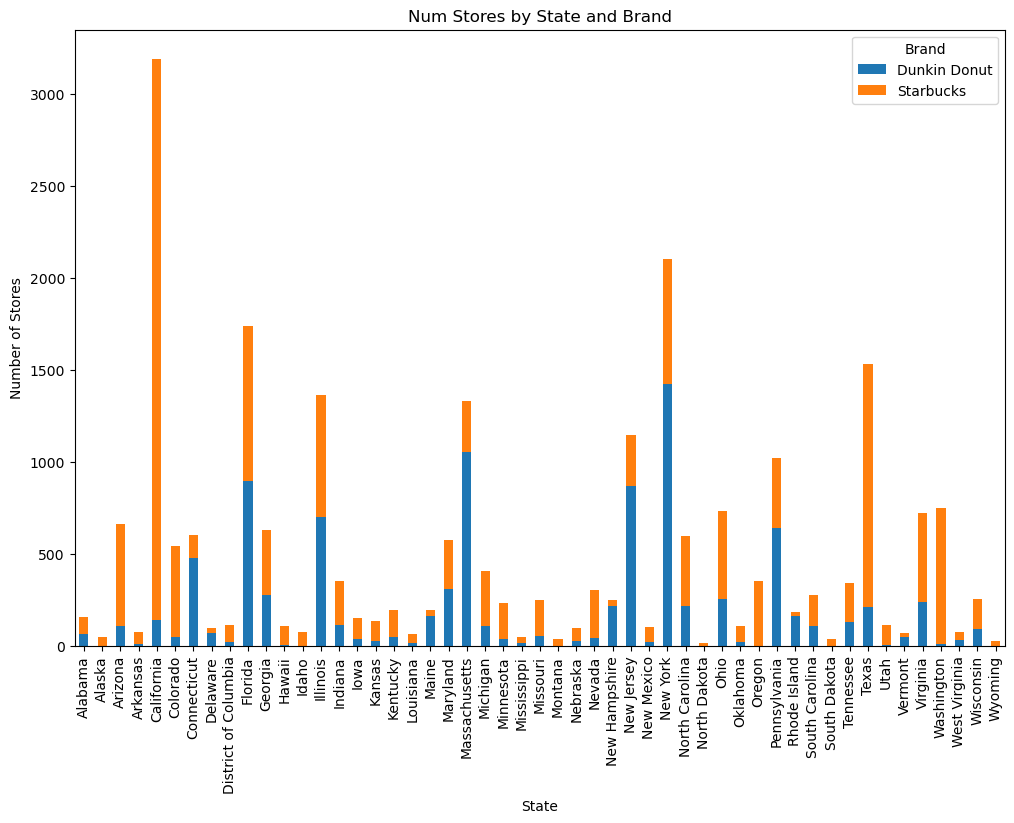

In [127]:
# Question Ex #1
# groupby state and brand to get num_stores. ((use mean b/c we have many repeats due to there being multiple obs for some years)
state_brand_data = final_df.groupby(['state', 'Brand'])['num_stores'].mean().unstack()

# barplot using .plot
state_brand_data.plot(kind='bar', figsize=(12, 8), stacked=True)
#plot labs
plt.title('Num Stores by State and Brand')
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.show()

We can see that both chains tends to be a lot more prevelent that the other brand in almost every state.

In states like California, starbucks is dominant while in states like New Jersey dunkin donuts is more dominant.

There are a few cases where there is a good mix between number of stores and brand (Florida and Illinois)

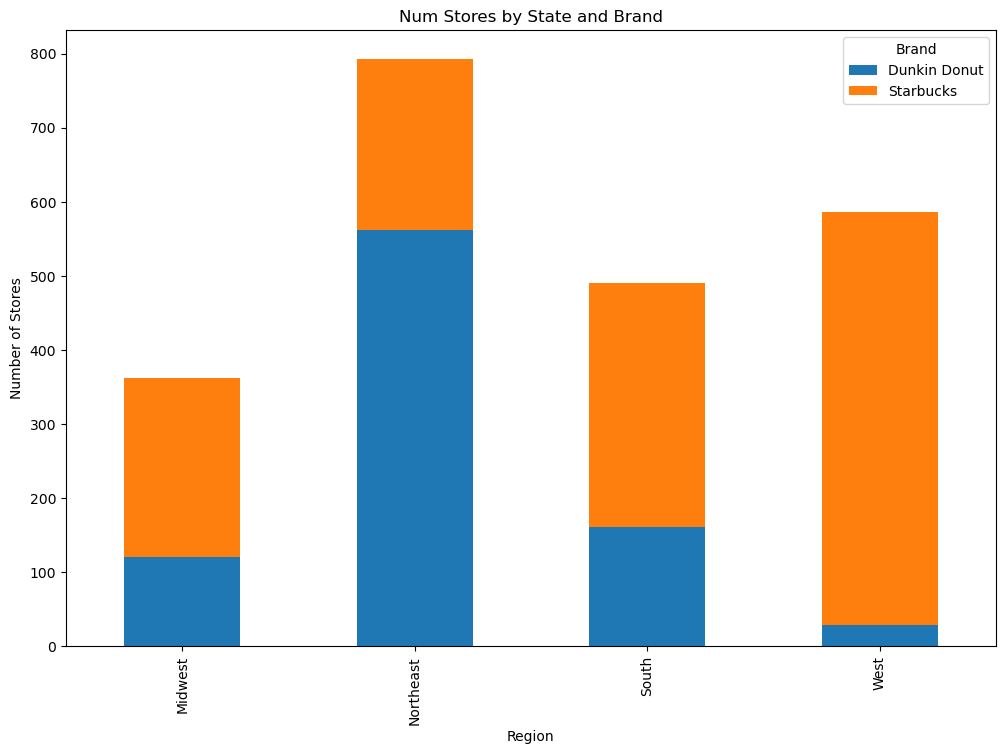

In [128]:
#1 cont.
# groupby region and brand to get num_stores (use mean b/c we have many repeats due to there being multiple obs for some years)
state_brand_data = final_df.groupby(['region', 'Brand'])['num_stores'].mean().unstack()

# barplot using .plot
state_brand_data.plot(kind='bar', figsize=(12, 8), stacked=True)
#plot labs
plt.title('Num Stores by State and Brand')
plt.xlabel('Region')
plt.ylabel('Number of Stores')
plt.show()

For regions, starbucks seems to be dominating in every region except northeast

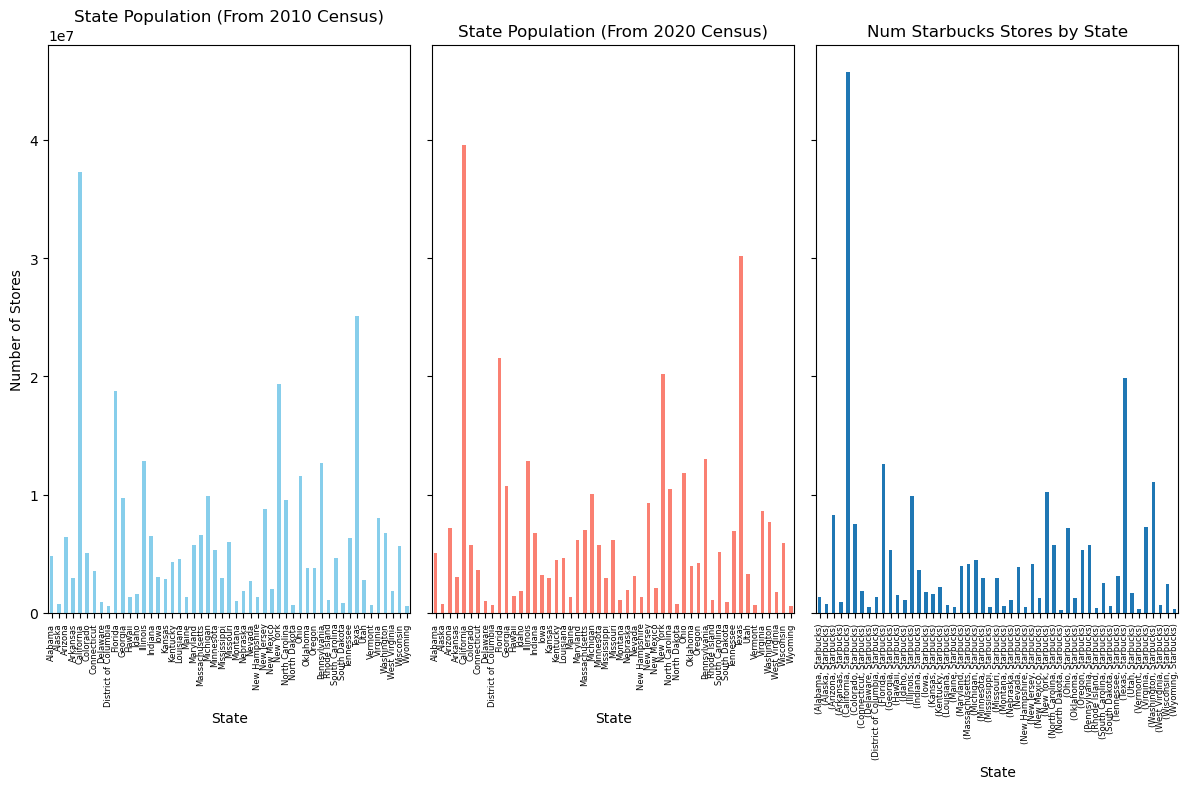

In [129]:
# Question Example #3

#filter to only starbucks data
starbucks = final_df[final_df['Brand'] == "Starbucks"]

#multiplied the num stores count by 15000 so that we can better see the distribution when compared to state population
#(use mean b/c we have many repeats due to there being multiple obs for some years)
state_brand_data = starbucks.groupby(['state', 'Brand'])['num_stores'].mean() * 15000

# groupby by state to get population for each census year
state_brand_data_2020 = final_df.groupby('state')['census_2020'].mean()
state_brand_data_2010 = final_df.groupby('state')['census_2010'].mean()

# creates side-by-side bar plots
# Refrenced CHATGPT
# (1,3) represents the col,rows that the side-by-side bar plots will appear in
# so 1,3 is 1 row 3 cols setup
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# barplot for 2020 Census
state_brand_data_2010.plot(kind='bar', ax=axes[0], color='skyblue')
#labs
axes[0].set_title('State Population (From 2010 Census)')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Stores')
axes[0].tick_params(axis='x', labelsize=6)

# barplot for 2010 Census
state_brand_data_2020.plot(kind='bar', ax=axes[1], color='salmon')
#labs
axes[1].set_title('State Population (From 2020 Census)')
axes[1].set_xlabel('State')
axes[1].tick_params(axis='x', labelsize=6)

# barplot for num starbucks stores
state_brand_data.plot(kind='bar', figsize=(12, 8), stacked=True)
#labs
plt.title('Num Starbucks Stores by State')
plt.xlabel('Region')
axes[2].set_xlabel('State')
axes[2].tick_params(axis='x', labelsize=6)

#adjusts layout (refrenced CHATGPT)
plt.tight_layout()
plt.show()


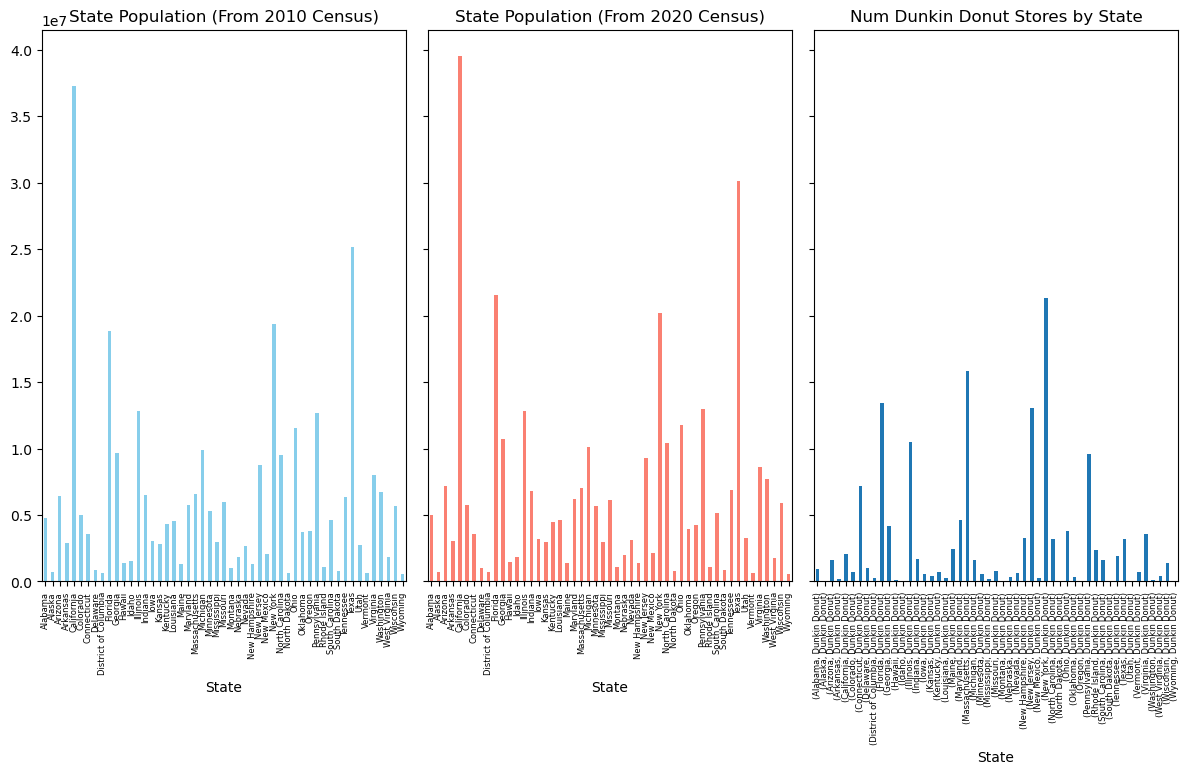

In [130]:
#filter to only dunkindonuts data
dunkin = final_df[final_df['Brand'] == "Dunkin Donut"]

#multiplied the num stores count by 15000 so that we can better see the distribution when compared to state population
#(use mean b/c we have many repeats due to there being multiple obs for some years)
state_brand_data = dunkin.groupby(['state', 'Brand'])['num_stores'].mean() * 15000

# groupby by state to get population for each census year
state_brand_data_2020 = final_df.groupby('state')['census_2020'].mean()
state_brand_data_2010 = final_df.groupby('state')['census_2010'].mean()

# creates side-by-side bar plots
# Refrenced CHATGPT
# (1,3) represents the col,rows that the side-by-side bar plots will appear in
# so 1,3 is 1 row 3 cols setup
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# barplot for 2020 Census
state_brand_data_2010.plot(kind='bar', ax=axes[0], color='skyblue')
#labs
axes[0].set_title('State Population (From 2010 Census)')
axes[0].set_xlabel('State')
axes[0].tick_params(axis='x', labelsize=6)

# barplot for 2010 Census
state_brand_data_2020.plot(kind='bar', ax=axes[1], color='salmon')
#labs
axes[1].set_title('State Population (From 2020 Census)')
axes[1].set_xlabel('State')
axes[1].tick_params(axis='x', labelsize=6)

# barplot for num dunkindonuts stores
state_brand_data.plot(kind='bar', figsize=(12, 8), stacked=True)
#labs
plt.title('Num Dunkin Donut Stores by State')
plt.xlabel('Region')
axes[2].set_xlabel('State')
axes[2].tick_params(axis='x', labelsize=6)

#adjusts layout (refrenced CHATGPT)
plt.tight_layout()
plt.show()

After comparing both num store distribution by population for both brands, it appears that starbucks better matches the state populations when compared to dunkin donut (although it is a very close comparison)

We can further analyze these results when comparing by region

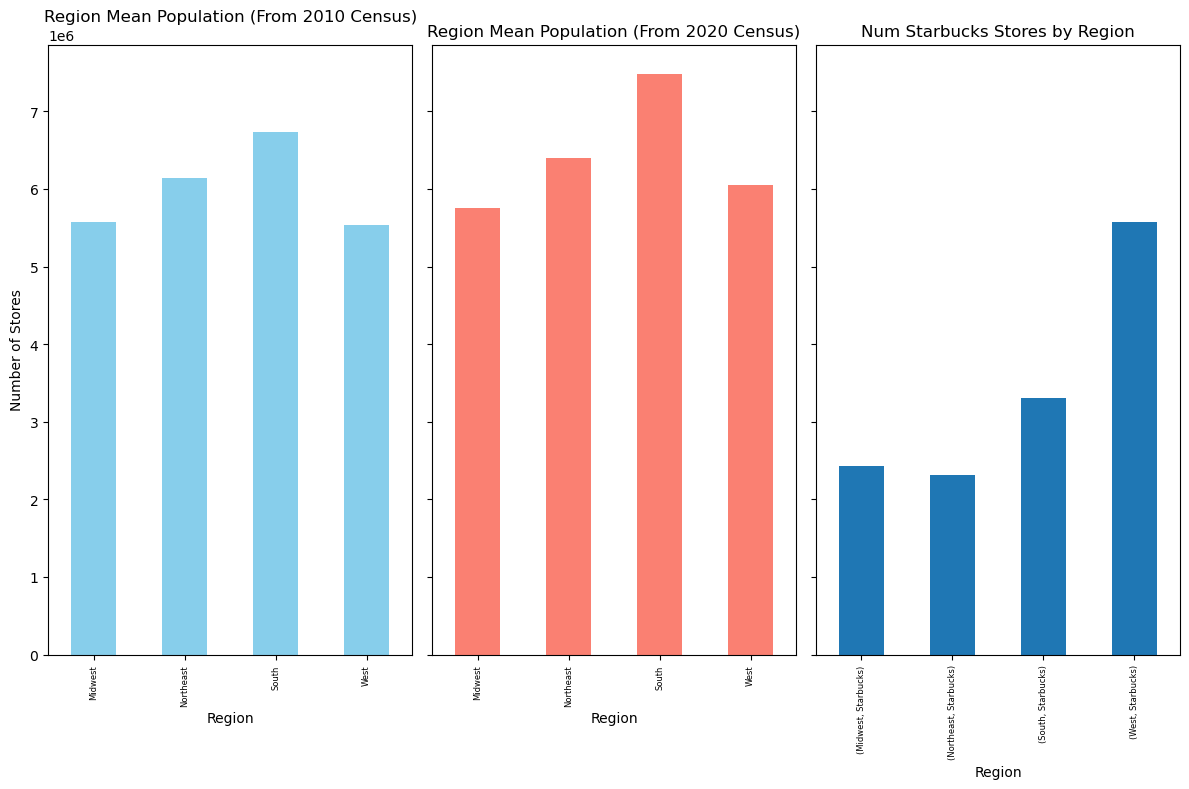

In [131]:
# 3 cont.
# **Same steps as the previous plot but we are grouping by region now instead**

starbucks = final_df[final_df['Brand'] == "Starbucks"]

#multiplied the num stores count by 500 so that we can better see the distribution when compared to region population
state_brand_data = starbucks.groupby(['region', 'Brand'])['num_stores'].mean() * 10000

# groupbyby state to get num_stores for each census year
state_brand_data_2020 = final_df.groupby('region')['census_2020'].mean()
state_brand_data_2010 = final_df.groupby('region')['census_2010'].mean()

# creates side-by-side bar plots
# Refrenced CHATGPT
# (1,3) represents the col,rows that the side-by-side bar plots will appear in
# so 1,3 is 1 row 3 cols setup
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# barplot for 2020 Census
state_brand_data_2010.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Region Mean Population (From 2010 Census)')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Number of Stores')
axes[0].tick_params(axis='x', labelsize=6)

# barplot for 2010 Census
state_brand_data_2020.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Region Mean Population (From 2020 Census)')
axes[1].set_xlabel('Region')
axes[1].tick_params(axis='x', labelsize=6)

# barplot for num starbucks stores
state_brand_data.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Num Starbucks Stores by Region')
plt.xlabel('Region')
axes[2].set_xlabel('Region')
axes[2].tick_params(axis='x', labelsize=6)

#adjusts layout (refrenced CHATGPT)
plt.tight_layout()
plt.show()


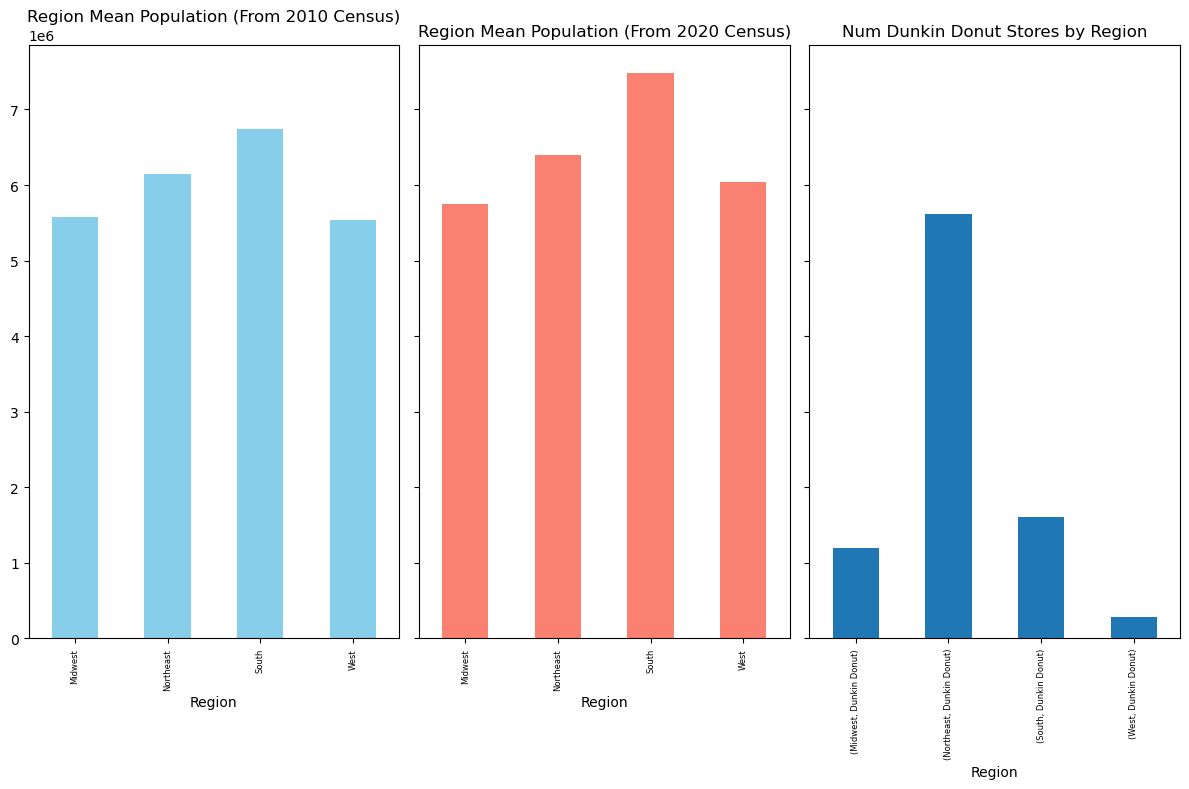

In [132]:

dunkin = final_df[final_df['Brand'] == "Dunkin Donut"]

#multiplied the num stores count by 10000 so that we can better see the distribution when compared to region population
state_brand_data = dunkin.groupby(['region', 'Brand'])['num_stores'].mean() * 10000

# groupby state to get num_stores for each census year
state_brand_data_2020 = final_df.groupby('region')['census_2020'].mean()
state_brand_data_2010 = final_df.groupby('region')['census_2010'].mean()

# creates side-by-side bar plots
# Refrenced CHATGPT
# (1,3) represents the col,rows that the side-by-side bar plots will appear in
# so 1,3 is 1 row 3 cols setup
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# barplot for 2020 Census
state_brand_data_2010.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Region Mean Population (From 2010 Census)')
axes[0].set_xlabel('Region')
axes[0].tick_params(axis='x', labelsize=6)

# barplot for 2010 Census
state_brand_data_2020.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Region Mean Population (From 2020 Census)')
axes[1].set_xlabel('Region')
axes[1].tick_params(axis='x', labelsize=6)

# barplot for num dunkindonuts stores
state_brand_data.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Num Dunkin Donut Stores by Region')
plt.xlabel('Region')
axes[2].set_xlabel('Region')
axes[2].tick_params(axis='x', labelsize=6)

#adjusts layout (refrenced CHATGPT)
plt.tight_layout()
plt.show()

After comparing both num store distribution by population for both brands, it seems more clear that starbucks better matches the overall region mean populations when compared to dunkin donut

Where starbucks is accurately matching west region population and and dunkin donut is accuaretly the northeast region population

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 5 rows containing non-finite values.


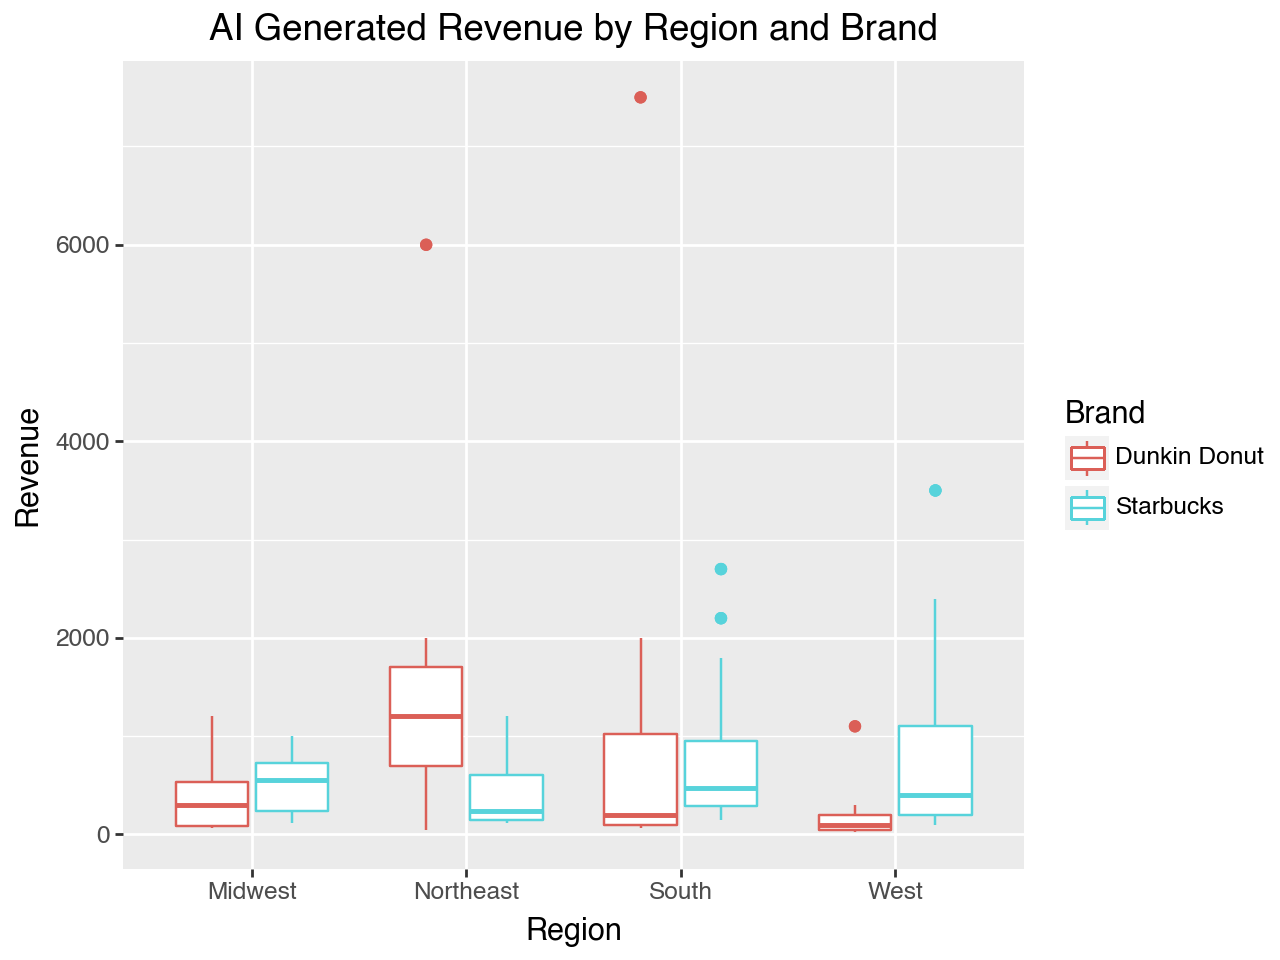

In [133]:
#Question Example #4
#boxplot of revenue by region and Brand
(ggplot(final_df, aes(x='region', y='revenue', color='Brand'))
+ geom_boxplot()
+ labs(x = "Region", y = "Revenue", title = "AI Generated Revenue by Region and Brand")
)

From the boxplot above, we can see that some of the revenues follow the general trends that we were able to spot in the previous graphs. 

Even though the revenues were AI generated, they seem to be pretty accurate to the previous graphs. This is due to the fact that brand names and region information was given prior to the revenue data being genrated.

**Automate**

Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should:

- Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

- Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

- Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee.

I extracted the company name in the get_info function, it just won't appear in the output because I don't know how I would incorporate it into the dataset.

In [134]:
#I decided to do this down here and not change anything from above:
def get_info(url):

    """
    Returns a dataframe based on url
  
    Parameters
    ----------
    url: string
    
    Return
    ------
    final_data: df
    """

    #requests
    response = requests.get(url)

    #soup
    soup = BeautifulSoup(response.content, "html.parser")
    
    #gets html for company name
    text = soup.find("div",
                    attrs={
                      "class": "actionbar-title m-0 flex-1 px-2 py-2"}
                  )
    #finds text tag
    company_name_tag = text.find("h2")
    #strips
    company_name = company_name_tag.text.strip()
    #removes everything except company name
    #Refrenced CHAT GPT for line below:
    company_name = company_name.split('Stores')[0].strip()


    #table (dont want table to be a list)
    table = soup.find("table",
                    attrs={
                      "class": "wpr-table"}
                  )

    #gets all the column names (not including state) using get_cols function
    col_names = get_cols(table)

    #get the number of columns
    num_cols = len(col_names.columns)

    #get df using get_table function
    df = get_table(table, num_cols)

    #rename columns
    rename_dict = {"col_{}".format(i+1): name for i, name in enumerate(col_names)}
    df = df.rename(columns=rename_dict)

    #remove commas in all columns except the state so that we can convert everything to numeric
    df.iloc[:, 1:] = df.iloc[:, 1:].replace({',': ''}, regex=True)

    #convert all cols except state (which is the first col) to numeric
    df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


    #return the final dataframe
    return(df)


In [135]:
#**This chunk gets the number of columns that we will need to scrape
def get_cols(table):

    """
    Returns the all the column names (apart from state) based on html table
  
    Parameters
    ----------
    table: html
    
    Return
    ------
    col_names: list 
    """

    # list to store cols
    cols = []

    # find all table headers (th elements)
    for columns in table.find_all("th"):
        # get text from each header (strip all leading/trailing spaces)
        header_text = columns.get_text(strip=True)
        
        # append each header to col list
        cols.append(header_text)

    # List of state names to filter out
    # b/c we used "th", all the states were being saved (not sure how to fix this)
    # also we don't want to store 'State' b/c all dataframes will have that, we just want to keep the years for each numeric col
    states = ['State', 'California', 'Texas', 'Florida', 'Washington', 'New York', 'Illinois', 'Arizona', 
            'Colorado', 'Ohio', 'Virginia', 'Oregon', 'Pennsylvania', 'North Carolina', 
            'Georgia', 'Michigan', 'Massachusetts', 'New Jersey', 'Maryland', 'Nevada', 
            'Indiana', 'Missouri', 'Minnesota', 'Tennessee', 'Kentucky', 'Wisconsin', 
            'South Carolina', 'Connecticut', 'Utah', 'Hawaii', 'Kansas', 'District of Columbia', 
            'Iowa', 'Alabama', 'Louisiana', 'Oklahoma', 'New Mexico', 'Idaho', 'Nebraska', 
            'Arkansas', 'Alaska', 'Mississippi', 'Montana', 'Maine', 'New Hampshire', 
            'Rhode Island', 'Delaware', 'South Dakota', 'West Virginia', 'Wyoming', 
            'North Dakota', 'Vermont']

    #refrenced CHATGPT
    # Filter out columns that match any state name
    filtered_cols = [col for col in cols if col not in states]

    # Convert the filtered list of column headers into a DataFrame
    col_names = pd.DataFrame(columns=filtered_cols)

    return(col_names)

In [136]:
##Gets table info with input being table and the number of cols in that table (after state)
def get_table(table, num_cols):

    """
    Returns a df based on html table and num_cols
  
    Parameters
    ----------
    table: html
    num_cols: integer
    
    Return
    ------
    df: df
    """

    # list to store data
    rows = []

    # find all rows ("tr") (but skip 1st b/c its a header)
    for row in table.find_all("tr")[1:]:

        # dictionary to store each row
        row_data = {}

        # get state from <th> element
        state_cell = row.find("th")

        #check if there is state cell
        if state_cell:
            #get text from state cell
            state = state_cell.text.strip()
            #store in row_data dictionary
            row_data["State"] = state 

        # Get data for each column in <td> cells (sets length by num_cols)
        cells = row.find_all("td")[:num_cols]  

        #refrenced CHAT GPT
        #does loop where iteration for each cell is happening.
        #the enumerate function (which CHATGPT gave me) "adds a counter to each element in cells"
        #this allows us to loop over each cell in cells
        for i, cell in enumerate(cells):

            #store in row_data in col based on column number
            #choose column number and automatically number using .format
            # we will change the col name back in the main function
            row_data["col_{}".format(i+1)] = cell.text.strip()

        # at the end of the row we append the individual row_data to rows (which is created outside the loop)
        rows.append(row_data)

    # makes dataframe with all the rows
    df = pd.DataFrame(rows)

    #returns the dataframe
    return df


In [137]:
#create table for unit tests of individual functions
#requests
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

#soup
soup = BeautifulSoup(response.content, "html.parser")
    
#gets html for company name
text = soup.find("div",
                    attrs={
                      "class": "actionbar-title m-0 flex-1 px-2 py-2"}
                  )

#table (dont want table to be a list)
table = soup.find("table",
                    attrs={
                      "class": "wpr-table"}
                  )

In [138]:
#unit test of get_table function
#get_table(table, 3).head()

In [139]:
#unit test of get_cols function
#get_cols(table)

In [140]:
#unit test of get_info function which incorporates all the function with one input (the url)

#starbucks
starbucks_test = get_info("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

#walmart
walmart_test = get_info("https://worldpopulationreview.com/state-rankings/walmart-stores-by-state")

walmart_test.head()

,State,# of Stores
0,Texas,517
1,Florida,341
2,California,280
3,North Carolina,192
4,Georgia,189
